In [1]:
# 데이터 불러오기
import pandas as pd

df = pd.read_csv("C://users/JunYoungPark/ai_study/data_files/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [17]:
# 결측값 확인
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [3]:
# dtype 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
# 불필요한 columns 삭제
df = df.drop(columns=['id', 'date', 'zipcode'])

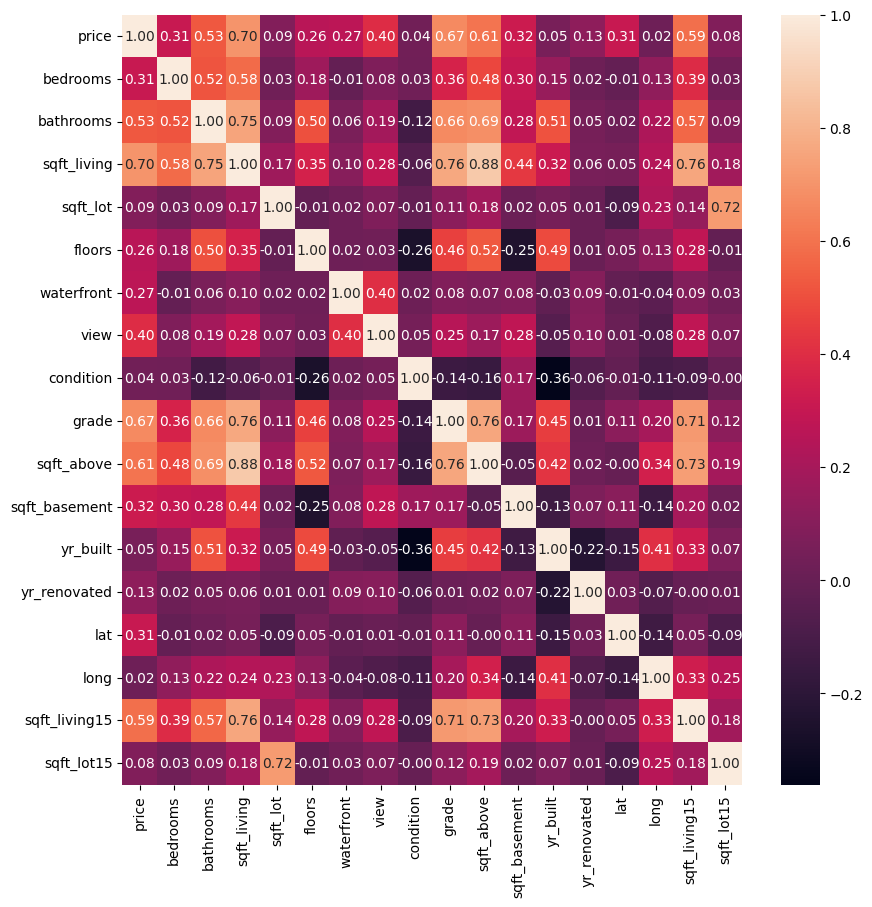

In [6]:
# corr 확인
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

In [7]:
# X, y 나누기
X = df.drop(columns=['price'])
y = df['price']

In [8]:
# normalization (accuracy 향상을 위해 정규화)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [9]:
# 데이터셋 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17290, 17), (4323, 17), (17290,), (4323,))

In [10]:
# 모델 생성 
import tensorflow as tf

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(17, )))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(1))

In [11]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2304      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 3

In [12]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
433/433 [==============================] - 2s 3ms/step - loss: 397078167552.0000 - mae: 518401.1562 - val_loss: 256327630848.0000 - val_mae: 424244.5938
Epoch 2/50
433/433 [==============================] - 1s 3ms/step - loss: 119561822208.0000 - mae: 252537.1719 - val_loss: 64154836992.0000 - val_mae: 189627.0469
Epoch 3/50
433/433 [==============================] - 1s 3ms/step - loss: 64889356288.0000 - mae: 183703.1406 - val_loss: 53756829696.0000 - val_mae: 171589.5781
Epoch 4/50
433/433 [==============================] - 1s 3ms/step - loss: 57712324608.0000 - mae: 169403.7188 - val_loss: 47535190016.0000 - val_mae: 158636.7812
Epoch 5/50
433/433 [==============================] - 1s 3ms/step - loss: 52123316224.0000 - mae: 157375.6875 - val_loss: 42356072448.0000 - val_mae: 146723.2188
Epoch 6/50
433/433 [==============================] - 1s 3ms/step - loss: 47572713472.0000 - mae: 147271.3594 - val_loss: 38178566144.0000 - val_mae: 135639.2500
Epoch 7/50
433/433 [=====

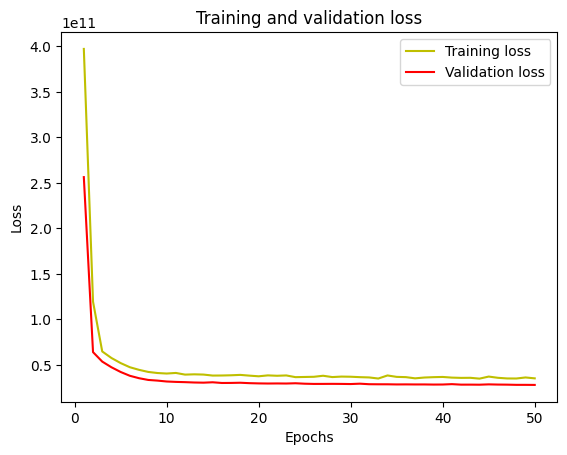

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
# 예측값 계산
y_pred = model.predict(X_test)

# DataFrame으로 변환하여 비교
df_compare = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred.flatten()})

# 처음 5개 샘플만 출력
print(df_compare.head(5))

136/136 [==============================] - 0s 1ms/step
      Actual     Predicted
0   365000.0  3.788171e+05
1   865000.0  8.157066e+05
2  1038000.0  1.229577e+06
3  1490000.0  1.919931e+06
4   711000.0  6.453852e+05


In [15]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.4f}")  # 1에 가까울수록 좋음

MAE: 110529.88
R² Score: 0.7624


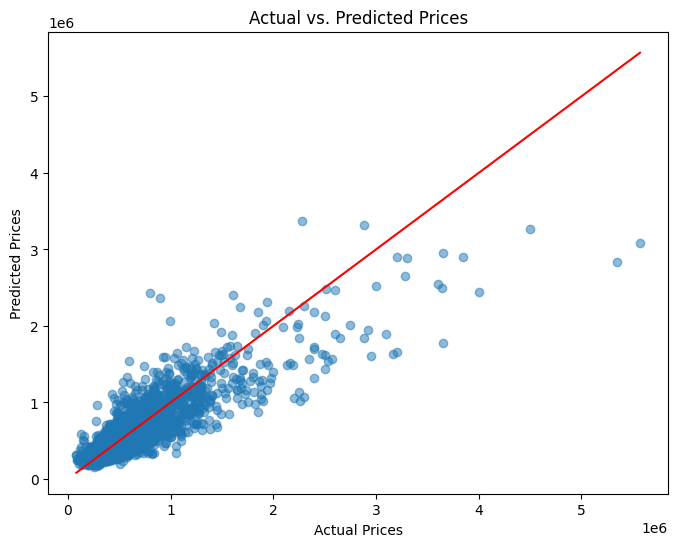

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="-")  # 대각선 (완벽한 예측)
plt.show()